In [1]:
#주피터에선 코드가 잘 작동하지 않습니다. colab에서 코드 돌려보시는걸 추천합니다.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [36]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
import csv
from sklearn.model_selection import train_test_split

In [37]:
sk_hynix = '/content/drive/My Drive/hinix_long.csv'
df = pd.read_csv(sk_hynix,encoding='UTF-8', index_col='날짜')

In [38]:
df.head()

,종가,대비,등락률,시가,고가,저가,거래량,거래대금,시가총액,상장주식수,자본금순이익률,자기자본순이익율,주당배당금,배당수익률,배당금총액,당기순이익,매출액증가율,영업이익(조단위),반도체 수출금액지수,금리,WIT 현물유가등락률,원달러환율(원)
날짜,,,,,,,,,,,,,,,,,,,,,,
2000,17703,-83,-0.551618,17780,18341,17207,10801089,1.770000e+11,8.670000e+12,490276394,-1.04,-0.36,0,0.0,0.0,-2.570000e+12,0.12,0.0160,40.603333,5.25,58.775000,1259.7
2001,2785,-7,0.048293,2804,2916,2693,143710787,2.780000e+11,1.790000e+12,759312395,-1.33,-0.94,0,0.0,0.0,-5.050000e+12,-0.50,-1.9100,22.136667,4.00,-14.066667,1326.1
2002,955,-9,-0.572295,966,1012,919,407824329,3.010000e+11,2.060000e+12,3420237905,-0.12,-0.40,0,0.0,0.0,-2.030000e+12,-0.11,-0.6712,26.222500,4.25,8.150000,1200.4
2003,4688,11,0.160526,4700,4867,4556,57406618,1.040000e+11,2.360000e+12,1818367110,-0.14,-0.54,0,0.0,0.0,-2.100000e+12,0.02,0.0432,31.284167,3.75,18.675000,1197.8
2004,10761,24,0.382972,10781,11088,10489,11116629,1.200000e+11,4.780000e+12,444434620,0.76,0.46,0,0.0,0.0,1.720000e+12,0.39,2.0300,41.820000,3.25,36.241667,1043.8


In [39]:
def MinMaxScaler(data):
  numerator = data - np.min(data, 0)
  denominator = np.max(data, 0) - np.min(data, 0)
  return numerator / (denominator + 1e-7)

In [42]:
dfx = df[['시가','고가','저가','거래량','종가','자본금순이익률','자기자본순이익율','주당배당금','배당수익률','배당금총액','매출액증가율','영업이익(조단위)','반도체 수출금액지수','금리','WIT 현물유가등락률', '원달러환율(원)']]
dfx = MinMaxScaler(dfx)
dfy = dfx[['종가']]
x = dfx.values.tolist()
y = dfy.values.tolist()
print(len(y))

21


In [90]:
data_x = []
data_y = []
#window_size는 예측하고자 하는 기간입니다. 현재 5년 예측입니다.
window_size = 5
for i in range(len(y) - window_size):
  _x = x[i : i + window_size]
  _y = y[i + window_size]
  data_x.append(_x)
  data_y.append(_y)
print(_x, "->", _y)

[[0.4483915352333401, 0.4469723290030518, 0.4490241115427821, 0.0007104300988210874, 0.44760528441819325, 0.5127388453385533, 0.8214285127551062, 0.3333333333111111, 0.6399999744000011, 0.34271844660194173, 0.47199996224000296, 0.31898066643681605, 0.4291297714819145, 0.2105263113573408, 0.0, 0.6113493062770873], [0.37513787653042935, 0.3740123505212839, 0.3761931693574762, 4.396262560012782e-06, 0.37530296651110556, 0.4522292921619539, 0.7642856596938814, 0.3999999999733333, 0.5199999792000009, 0.4116504854368932, 0.3359999731200021, 0.22847100075364232, 0.4238802952189124, 0.1578947335180056, 0.36047817682365785, 0.7034047917519787], [0.7204034523138009, 0.7190648570491902, 0.7216034349418603, 0.0022153604776277563, 0.720701858193784, 0.786624191295793, 0.9285713622449026, 0.6666666666222222, 0.5199999792000009, 0.6854368932038835, 0.9999999200000064, 0.6871704714974936, 0.7420545979516655, 0.2105263113573408, 0.6172175860996874, 0.35762925589971545], [0.8824325399974046, 0.880338910

In [91]:
train_size = int(len(data_y) * 0.7)
train_x = np.array(data_x[0 : train_size])
train_y = np.array(data_y[0: train_size])

In [92]:
test_size = len(data_y) - train_size
test_x = np.array(data_x[train_size : len(data_x)])
test_y = np.array(data_y[train_size : len(data_y)])

In [93]:
model = Sequential()
#units 값과 input_shape(window_size, ???)에서 ???값이 일치해야 layer에 적합하는 과정 중 오류가 발생하지 않습니다.
model.add(LSTM(units=16, activation='relu', return_sequences=True, input_shape=(window_size,16)))
model.add(Dropout(0.1))
model.add(LSTM(units=16, activation='relu'))

In [94]:
model.add(Dropout(0.1))
model.add(Dense(units=1))
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_22 (LSTM)               (None, 5, 16)             2112      
_________________________________________________________________
dropout_20 (Dropout)         (None, 5, 16)             0         
_________________________________________________________________
lstm_23 (LSTM)               (None, 16)                2112      
_________________________________________________________________
dropout_21 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 17        
Total params: 4,241
Trainable params: 4,241
Non-trainable params: 0
_________________________________________________________________


In [95]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(train_x, train_y, epochs=50, batch_size=30)

Epoch 1/50
1/1 [==============================] - 2s 2s/step - loss: 0.0834
Epoch 2/50
1/1 [==============================] - 0s 9ms/step - loss: 0.0799
Epoch 3/50
1/1 [==============================] - 0s 10ms/step - loss: 0.0763
Epoch 4/50
1/1 [==============================] - 0s 8ms/step - loss: 0.0777
Epoch 5/50
1/1 [==============================] - 0s 10ms/step - loss: 0.0727
Epoch 6/50
1/1 [==============================] - 0s 12ms/step - loss: 0.0683
Epoch 7/50
1/1 [==============================] - 0s 14ms/step - loss: 0.0694
Epoch 8/50
1/1 [==============================] - 0s 11ms/step - loss: 0.0708
Epoch 9/50
1/1 [==============================] - 0s 8ms/step - loss: 0.0612
Epoch 10/50
1/1 [==============================] - 0s 9ms/step - loss: 0.0577
Epoch 11/50
1/1 [==============================] - 0s 9ms/step - loss: 0.0600
Epoch 12/50
1/1 [==============================] - 0s 12ms/step - loss: 0.0520
Epoch 13/50
1/1 [==============================] - 0s 9ms/step - los

In [96]:
pred_y = model.predict(test_x)

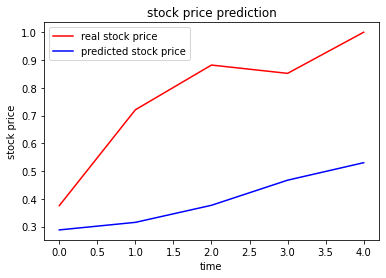

In [99]:
plt.figure()
plt.plot(test_y, color='red', label='real stock price')
plt.plot(pred_y, color='blue', label='predicted stock price')
plt.title('stock price prediction')
plt.xlabel('time')
plt.ylabel('stock price')
plt.legend()
plt.show()